<div align="center">

<img src="UoG.png" alt="uog" width="200"/>

# University of Gondar  
## College of Informatics  
## Department of Information Science  
## MSc in Data Science and Analytics  
### COMPUTER VISION ASSIGNMENT 1  
### Image Feature Extraction  

#### Eyob Birhanu  
#### May, 2025  

</div>

# **IMAGE FEATURE EXTRACTION**

### Image Features are distinctive characteristics or patterns such as **textures**, **shapes**, **color** that are extracted from images and they are used to train models.

### **First install the necessary main libraries**

In [15]:
import cv2 #powerful library for computer vision.
import numpy as np #Used for numerical operations, particularly with arrays and matrices.
import matplotlib.pyplot as plt #Useful for displaying images and visualizations.

# **1. Canny edge detection**

### Canny edge detection is a popular algorithm used to **detect edges** in an image. 
### It works by identifying areas with **rapid intensity change**. 
### An edge is defined as a **gradient in pixel intensity**, i.e., an abrupt color change.

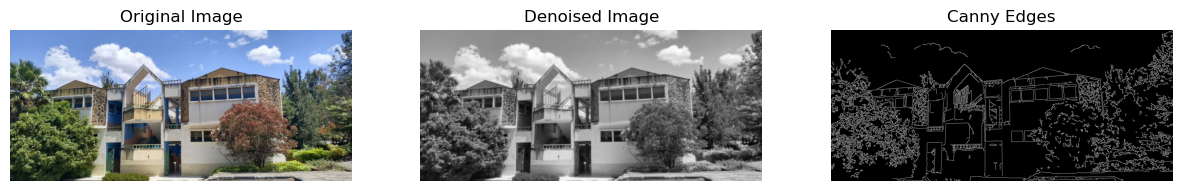

In [31]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('4.jpg')

# Convert BGR to RGB for correct display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
denoised_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Canny edge detection
canny_edges = cv2.Canny(denoised_image, 100, 200)

# Save result
cv2.imwrite('Canny_edges.jpg', canny_edges)

# Display images inline
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title("Denoised Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edges")
plt.axis("off")

plt.show()


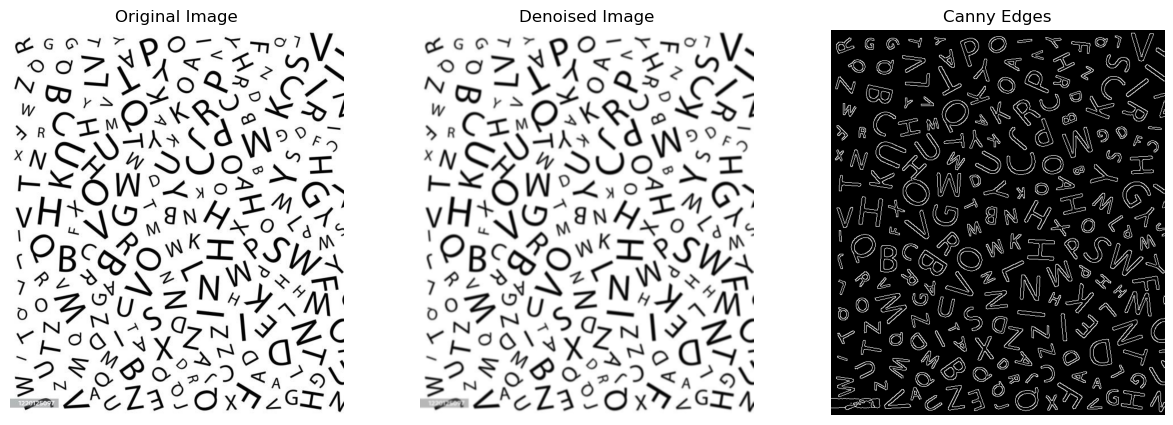

In [33]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('letter.jpg')

# Convert BGR to RGB (for correct color display)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur for denoising
denoised_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Perform Canny edge detection
canny_edges = cv2.Canny(denoised_image, 100, 200)

# Save edge image
cv2.imwrite('Canny_edges.jpg', canny_edges)

# Display images inline
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title("Denoised Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edges")
plt.axis("off")

plt.show()


# **2. Harris Corner Detection**

## Harris Corner Detection is used to **detect corners**.

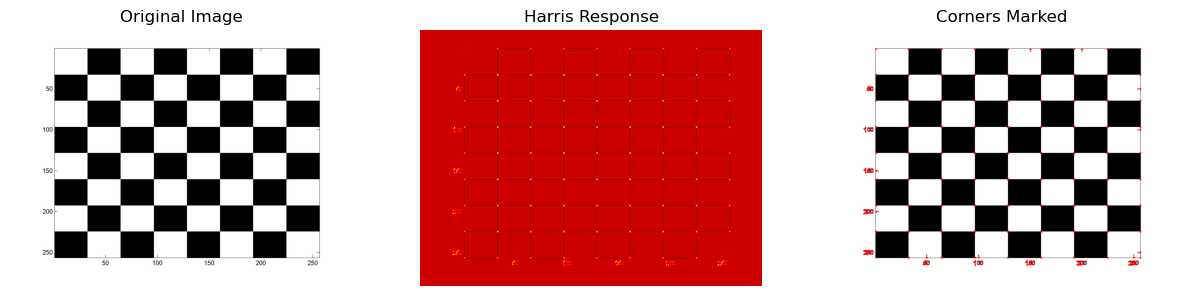

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
harrisImage = cv2.imread('chessboard.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(harrisImage, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
denoised_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Convert to float32
harrisImage_float32 = np.float32(denoised_image)

# Compute Harris corner response
harrisCorners = cv2.cornerHarris(harrisImage_float32, 2, 3, 0.04)

# Dilate corners to enhance
harrisCorners = cv2.dilate(harrisCorners, None)

# Threshold to mark corners on the original image
harrisImage_marked = harrisImage.copy()
harrisImage_marked[harrisCorners > 0.01 * harrisCorners.max()] = [0, 0, 255]  # mark corners in red

# Display images inline
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(harrisImage, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(harrisCorners, cmap='hot')
plt.title("Harris Response")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(harrisImage_marked, cv2.COLOR_BGR2RGB))
plt.title("Corners Marked")
plt.axis("off")

plt.show()


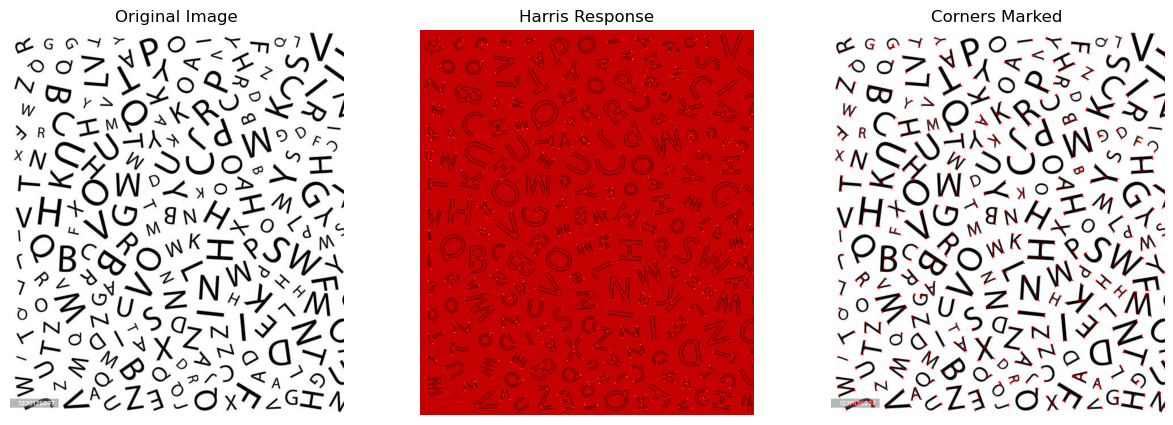

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
harrisImage = cv2.imread('letter.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(harrisImage, cv2.COLOR_BGR2GRAY)

# Convert to float32
harrisImage_float32 = np.float32(gray_image)

# Compute Harris corner response
harrisCorners = cv2.cornerHarris(harrisImage_float32, 2, 3, 0.04)

# Mark corners on a copy of the original image (red color)
harrisImage_marked = harrisImage.copy()
harrisImage_marked[harrisCorners > 0.01 * harrisCorners.max()] = [0, 0, 255]

# Display images inline
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(harrisImage, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(harrisCorners, cmap='hot')
plt.title("Harris Response")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(harrisImage_marked, cv2.COLOR_BGR2RGB))
plt.title("Corners Marked")
plt.axis("off")

plt.show()


# **3. Principal Component Analysis (PCA)**

### Principal Component Analysis is a technique for dimensionality reduction for a high dimensional data.

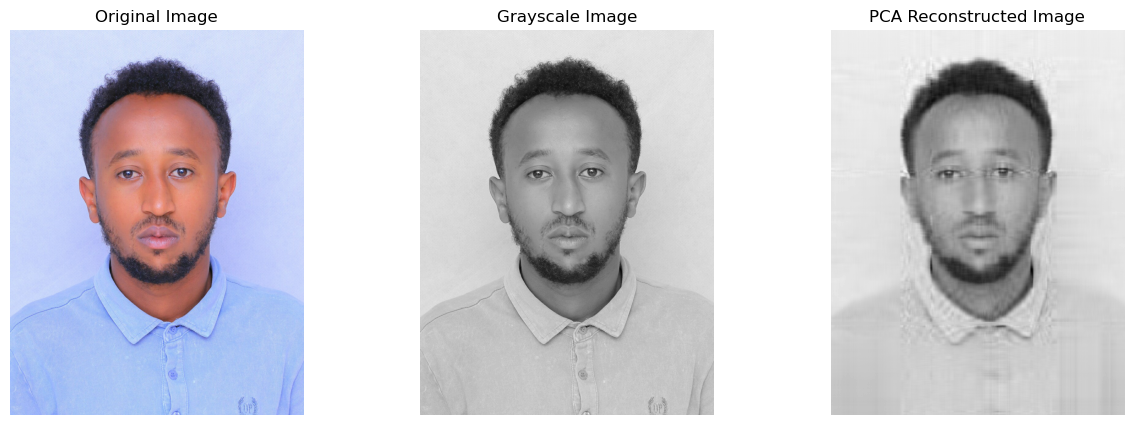

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the image
myImage = cv2.imread('MY.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)

# Get image dimensions
height, width = gray_image.shape

# Perform PCA
pca = PCA(n_components=20)  # Keep 20 principal components
image_pca = pca.fit_transform(gray_image)  # Apply PCA

# Reconstruct the image from PCA components
image_reconstructed = pca.inverse_transform(image_pca)

# Display images inline
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(myImage, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(image_reconstructed.astype(np.uint8), cmap='gray')
plt.title("PCA Reconstructed Image")
plt.axis("off")

plt.show()


# **4. Gabor Filter**

## Used for images with **repetitive textures or patterns**.
## highlight texture or edges in a given orientation.

![o](o.jpg)

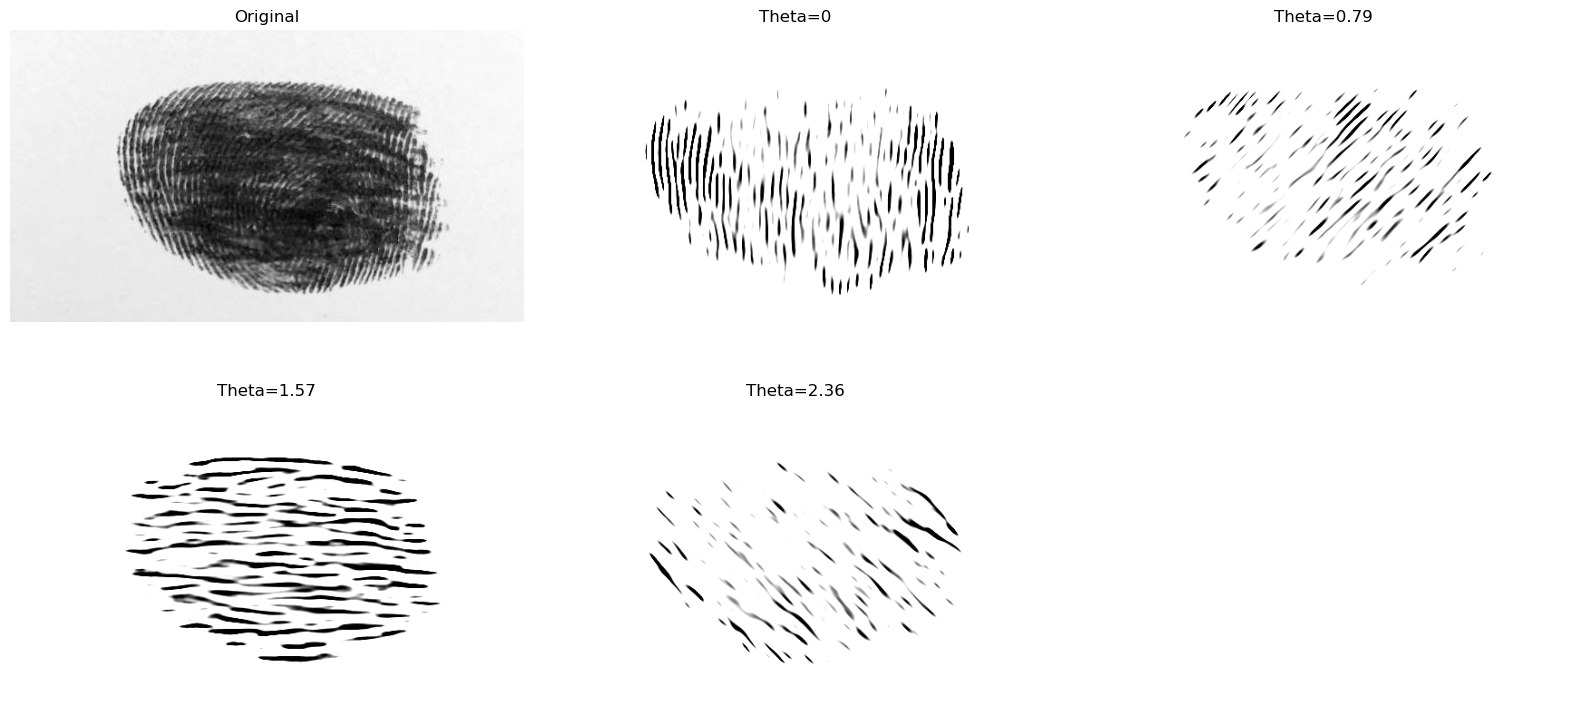

In [41]:
# Load the image in grayscale
img = cv2.imread('23.jpg', cv2.IMREAD_GRAYSCALE)

# Parameters for the Gabor kernel
ksize = 31 # size of gabor kernel
sigma = 4.0
lambd = 10.0
gamma = 0.5
psi = 0 # phase offset

# Define a list of theta values (orientations)
theta_list = [0, np.pi/4, np.pi/2, 3*np.pi/4]

# Create a subplot to display results
plt.figure(figsize=(16, 8))
plt.subplot(2, len(theta_list) // 2 + 1, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

# Apply Gabor filters at different orientations
for i, theta in enumerate(theta_list):
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
    filtered_img = cv2.filter2D(img, cv2.CV_8UC3, kernel)
    
    plt.subplot(2, len(theta_list) // 2 + 1, i + 2)
    plt.title(f'Theta={round(theta, 2)}')
    plt.imshow(filtered_img, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

# **5. Gray Level Co-occurrence Matrix**

## GLCM creates a matrix that describes **how frequently two pixels with specific gray levels (e.g., intensity values 0–255) occur next to each other** in a particular direction and distance.

GLCM Texture Features:
Contrast:
[[ 8.35635723 22.31594002 20.34874387 23.42782007]
 [18.63794906 22.31594002 45.36374262 23.42782007]
 [39.67542473 68.38185255 86.90651352 78.75097252]]

Correlation:
[[0.96898411 0.91674274 0.92415089 0.91259777]
 [0.93076751 0.91674274 0.83015902 0.91259777]
 [0.85245441 0.74240695 0.67243771 0.70343514]]

Energy:
[[0.06091481 0.04519281 0.04580563 0.04466573]
 [0.04897267 0.04519281 0.03838287 0.04466573]
 [0.0402892  0.03555084 0.03404837 0.03493855]]

Homogeneity:
[[0.46929473 0.30183133 0.30646487 0.29375853]
 [0.34512245 0.30183133 0.22174704 0.29375853]
 [0.24598558 0.19163124 0.17268125 0.18275403]]

Dissimilarity:
[[1.82967218 3.28661284 3.1551777  3.3770396 ]
 [2.86829478 3.28661284 4.80373401 3.3770396 ]
 [4.37603857 5.9210736  6.71358817 6.32306394]]

ASM:
[[0.00371061 0.00204239 0.00209816 0.00199503]
 [0.00239832 0.00204239 0.00147324 0.00199503]
 [0.00162322 0.00126386 0.00115929 0.0012207 ]]



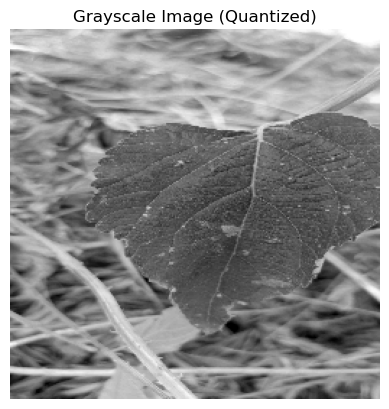

In [43]:
from skimage.feature import graycomatrix, graycoprops

# Load the image
image = cv2.imread('10.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize (keeps things manageable)
gray = cv2.resize(gray, (256, 256))

# Quantize to reduce gray levels (recommended for GLCM)
gray = (gray / 4).astype(np.uint8)  # 256 → 64 levels

# Compute the GLCM matrix
distances = [1, 2, 4]  # Pixel distances
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # 0°, 45°, 90°, 135°
glcm = graycomatrix(gray, 
                    distances=distances, 
                    angles=angles, 
                    symmetric=True, 
                    normed=True)

# Extract texture features
features = {
    'Contrast': graycoprops(glcm, 'contrast'),
    'Correlation': graycoprops(glcm, 'correlation'),
    'Energy': graycoprops(glcm, 'energy'),
    'Homogeneity': graycoprops(glcm, 'homogeneity'),
    'Dissimilarity': graycoprops(glcm, 'dissimilarity'),
    'ASM': graycoprops(glcm, 'ASM')
}

# Print the features
print("GLCM Texture Features:")
for name, value in features.items():
    print(f"{name}:\n{value}\n")

# Optional: visualize the grayscale image
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image (Quantized)')
plt.axis('off')
plt.show()

In [45]:
glcm

array([[[[4.28921569e-04, 3.69088812e-04, 3.37009804e-04,
          3.07574010e-04],
         [3.07578740e-04, 3.69088812e-04, 2.30684055e-04,
          3.07574010e-04],
         [1.24007937e-04, 1.71850833e-04, 6.20039683e-05,
          0.00000000e+00]],

        [[7.65931373e-05, 4.61361015e-05, 6.12745098e-05,
          3.84467512e-05],
         [6.15157480e-05, 4.61361015e-05, 3.07578740e-05,
          3.84467512e-05],
         [3.87524802e-05, 1.56228030e-05, 1.55009921e-05,
          2.34342046e-05]],

        [[4.59558824e-05, 3.07574010e-05, 4.59558824e-05,
          3.07574010e-05],
         [3.84473425e-05, 3.07574010e-05, 3.84473425e-05,
          3.07574010e-05],
         [7.75049603e-06, 3.12456061e-05, 3.10019841e-05,
          2.34342046e-05]],

        ...,

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.0

GLCM Texture Features:
Contrast:
[[118.41380208 143.96046136  90.93442096 121.59028066]
 [161.17347441 143.96046136 146.35943652 121.59028066]
 [190.08767361 208.31081567 196.54730903 181.37113531]]

Correlation:
[[0.54573163 0.44731894 0.65070549 0.5332006 ]
 [0.38200421 0.44731894 0.43762504 0.5332006 ]
 [0.27203296 0.20055889 0.24424075 0.30389767]]

Energy:
[[0.02783961 0.02664024 0.0292836  0.02757586]
 [0.02625625 0.02664024 0.02652895 0.02757586]
 [0.02557309 0.02532597 0.02547749 0.02562964]]

Homogeneity:
[[0.12917241 0.11334391 0.14621527 0.12428468]
 [0.10707732 0.11334391 0.1105518  0.12428468]
 [0.09647112 0.08888729 0.09226189 0.09519755]]

Dissimilarity:
[[ 8.22002145  9.22708189  7.18414522  8.38855825]
 [ 9.76522515  9.22708189  9.33406127  8.38855825]
 [10.74299355 11.35513756 10.98508805 10.53150338]]

ASM:
[[0.00077504 0.0007097  0.00085753 0.00076043]
 [0.00068939 0.0007097  0.00070379 0.00076043]
 [0.00065398 0.0006414  0.0006491  0.00065688]]



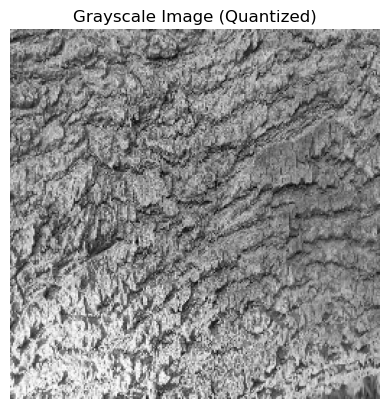

In [47]:


# Load and preprocess the image
image = cv2.imread('12a.jpg')  # Replace with your image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize (optional, keeps things manageable)
gray = cv2.resize(gray, (256, 256))

# Quantize to reduce gray levels (recommended for GLCM)
gray = (gray / 4).astype(np.uint8)  # 256 → 64 levels

# Compute the GLCM matrix
distances = [1, 2, 4]  # Pixel distances
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # 0°, 45°, 90°, 135°
glcm = graycomatrix(gray, 
                    distances=distances, 
                    angles=angles, 
                    symmetric=True, 
                    normed=True)

# Extract texture features
features = {
    'Contrast': graycoprops(glcm, 'contrast'),
    'Correlation': graycoprops(glcm, 'correlation'),
    'Energy': graycoprops(glcm, 'energy'),
    'Homogeneity': graycoprops(glcm, 'homogeneity'),
    'Dissimilarity': graycoprops(glcm, 'dissimilarity'),
    'ASM': graycoprops(glcm, 'ASM')
}

# Print the features
print("GLCM Texture Features:")
for name, value in features.items():
    print(f"{name}:\n{value}\n")

# Optional: visualize the grayscale image
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image (Quantized)')
plt.axis('off')
plt.show()

# **6. Scale Invariant Feature Transform (SIFT)**

## SIFT is a local feature descriptor used to **detect, describe, and match local features** (key points) that are scale, translation, and rotation invariants and partially invariant to changes in illumination projection, or 3D projection.

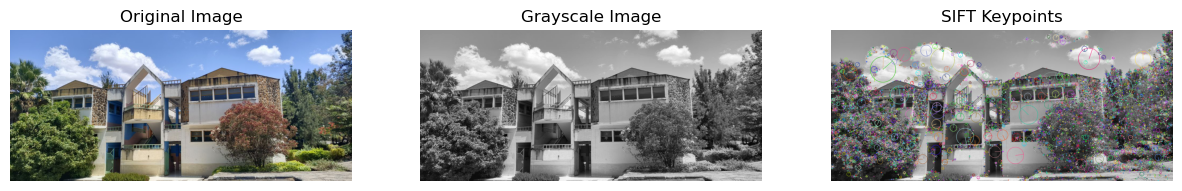

In [49]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('4.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(img_gray, None)

# Draw keypoints on the grayscale image
img_keypoints = cv2.drawKeypoints(img_gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display images inline
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_keypoints, cmap='gray')
plt.title("SIFT Keypoints")
plt.axis("off")

plt.show()


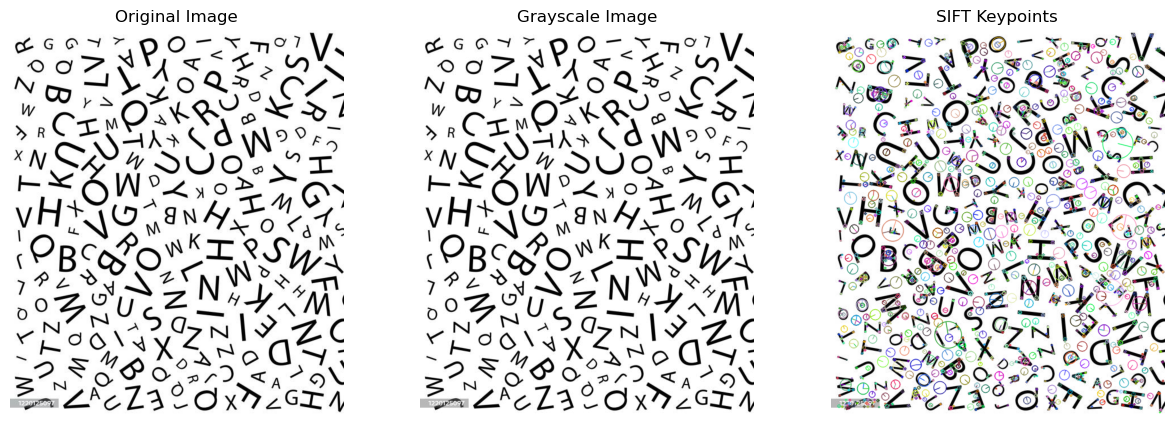

In [53]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('letter.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints, descriptors = sift.detectAndCompute(img_gray, None)

# Draw keypoints on the grayscale image
img_keypoints = cv2.drawKeypoints(
    img_gray, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Display images inline
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_keypoints, cmap='gray')
plt.title("SIFT Keypoints")
plt.axis("off")

plt.show()


# **7. Histogram of Oriented Gradients (HOG)**

## HOG is especially good for **detecting objects with clear, consistent edges** like humans, vehicles, or digits, because it describes how edges are oriented in **small regions of the image**.

## HOG captures the shape and structure of objects by:

## * Looking at edges in an image.
## * Measuring the direction (orientation) of those edges.
## * Summarizing this edge information into a histogram.

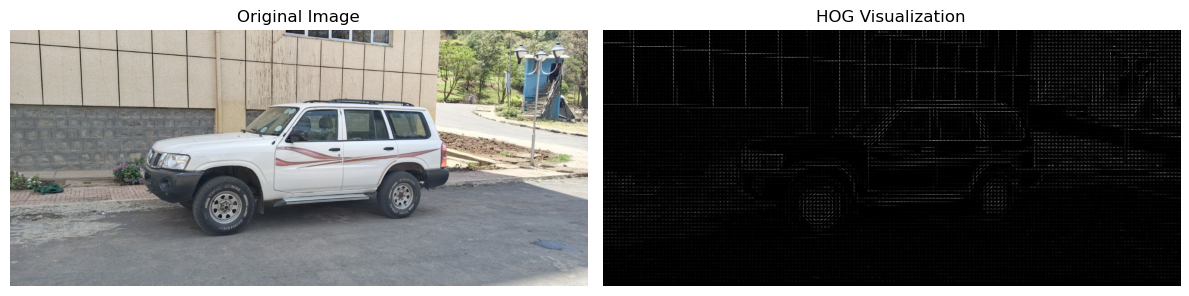

In [55]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog

# Load image
img = cv2.imread('18.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # For correct color display
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Compute HOG features and visualization
features, hog_image = hog(
    img_gray,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    visualize=True
)

# Display the original and HOG images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title("HOG Visualization")
plt.axis('off')

plt.tight_layout()
plt.show()


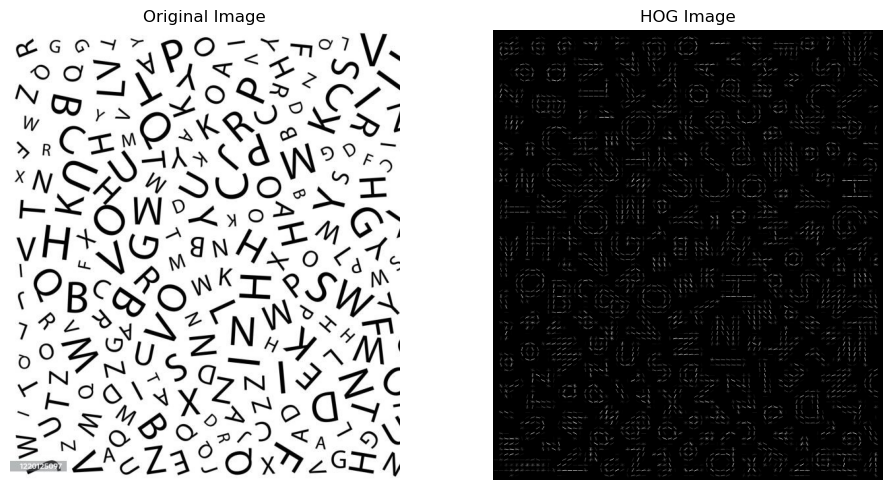

In [7]:
# Load image
img = cv2.imread('letter.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Compute HOG features and visualization
features, hog_image = hog(img_gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Display the original and HOG images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap=plt.cm.gray)
plt.title("HOG Image")
plt.axis('off')

plt.tight_layout()
plt.show()

# **8. Local Binary Patterns (LBP)**

## Local Binary Patterns is a visual descriptor used in computer vision to describe **textures**.

### It works by:
### * Looking at a pixel and comparing it with its neighbors.
### * Creating a binary code (like 10110101) based on whether those neighbors are brighter or darker.
### * Using those codes to capture texture patterns in an image.

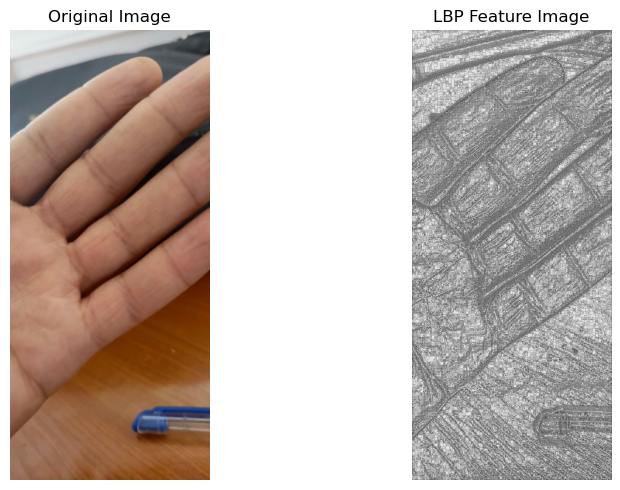

In [9]:
from skimage.feature import local_binary_pattern


# Load grayscale image
imageLBP = cv2.imread('22.jpg')

# Convert to RGB for proper color display with matplotlib
image_rgb = cv2.cvtColor(imageLBP, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray_image = cv2.cvtColor(imageLBP, cv2.COLOR_BGR2GRAY)

# Parameters
radius = 1  # distance from center pixel
n_points = 8 * radius  # number of neighbors

# Compute LBP
lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')

# Display original and LBP side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap='gray')
plt.title('LBP Feature Image')
plt.axis('off')

plt.tight_layout()
plt.show()

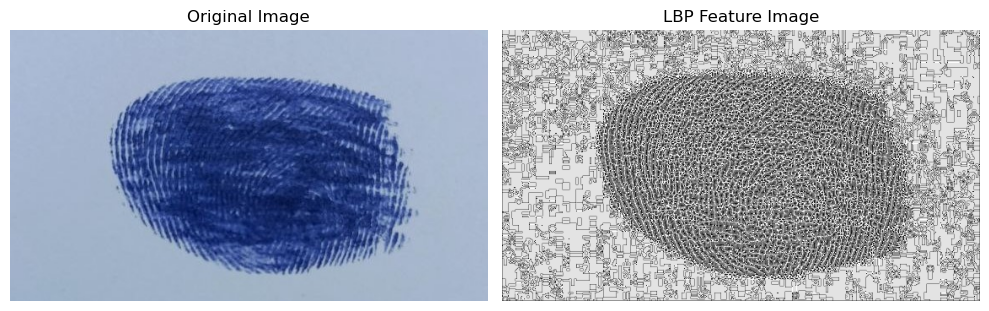

In [57]:
from skimage.feature import local_binary_pattern


# Load grayscale image
imageLBP = cv2.imread('23.jpg')

# Convert to RGB for proper color display with matplotlib
image_rgb = cv2.cvtColor(imageLBP, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray_image = cv2.cvtColor(imageLBP, cv2.COLOR_BGR2GRAY)

# Parameters
radius = 1  # distance from center pixel
n_points = 8 * radius  # number of neighbors

# Compute LBP
lbp = local_binary_pattern(gray_image, n_points, radius, method='uniform')

# Display original and LBP side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap='gray')
plt.title('LBP Feature Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# **9. Local Directional Pattern (LDP)**

## An LDP feature is created by computing **edge response values** of the **eight-neighboring pixels** in all eight directions

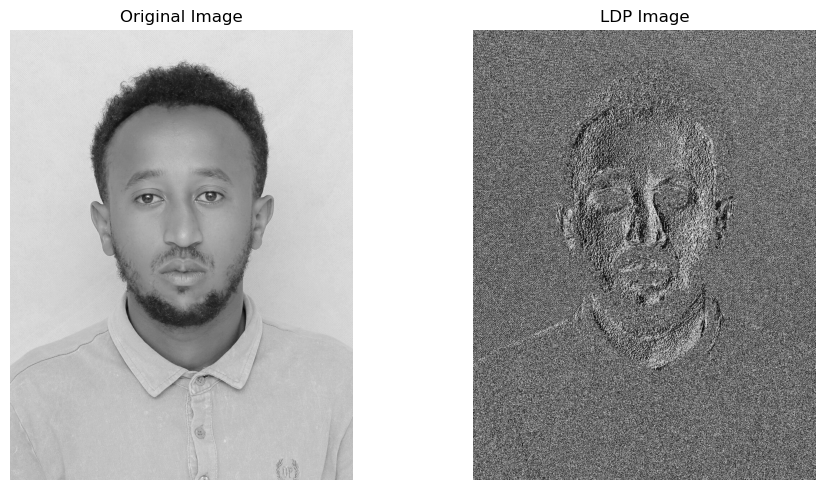

In [59]:
from scipy.ndimage import convolve

# Load grayscale image
imageLDP = cv2.imread('MY.jpg', cv2.IMREAD_GRAYSCALE)

# Kirsch Masks
kirsch_masks = [
    np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]]),  # North
    np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]]),  # NE
    np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]]),  # East
    np.array([[-3, -3, -3], [-3, 0, 5], [-3, 5, 5]]),  # SE
    np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]]),  # South
    np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]]),  # SW
    np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]]),  # West
    np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]])   # NW
]

# Compute edge responses
responses = [convolve(imageLDP, k) for k in kirsch_masks]

# Stack and find top-k responses (e.g., top 3)
stacked = np.stack(responses, axis=-1)
top_k = np.argsort(stacked, axis=-1)[..., -3:]  # top 3 directions

# Convert to binary pattern
ldp = np.zeros_like(imageLDP, dtype=np.uint8)
for i in range(8):
    mask = (top_k == i).any(axis=-1)
    ldp += (mask.astype(np.uint8) << i)

# Display original and LDP images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imageLDP, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ldp, cmap='gray')
plt.title('LDP Image')
plt.axis('off')

plt.tight_layout()
plt.show()